In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
df.shape

(150000, 21)

In [4]:
df.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

In [5]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [6]:
df = df[['Booking Status', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']]

In [7]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [8]:
df.isnull().sum()

Booking Status         0
Vehicle Type           0
Pickup Location        0
Drop Location          0
Avg VTAT               0
Avg CTAT               0
Booking Value          0
Ride Distance          0
Driver Ratings         0
Customer Rating        0
Payment Method     48000
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(320)

In [10]:
df.describe()

,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,8.445407,29.037753,478.121220,24.343568,4.257215,4.440842
std,3.639311,7.343053,329.339976,11.554362,0.345619,0.347835
min,2.000000,10.000000,50.000000,1.000000,3.000000,3.000000
25%,5.600000,25.000000,319.750000,17.360000,4.200000,4.300000
50%,8.300000,28.800000,414.000000,23.720000,4.300000,4.500000
75%,11.000000,32.900000,521.000000,30.650000,4.300000,4.600000
max,20.000000,45.000000,4277.000000,50.000000,5.000000,5.000000


In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

In [12]:
num_cols

['Avg VTAT',
 'Avg CTAT',
 'Booking Value',
 'Ride Distance',
 'Driver Ratings',
 'Customer Rating']

In [13]:
cat_cols

['Booking Status',
 'Vehicle Type',
 'Pickup Location',
 'Drop Location',
 'Payment Method']

Univariate Analysis ----------

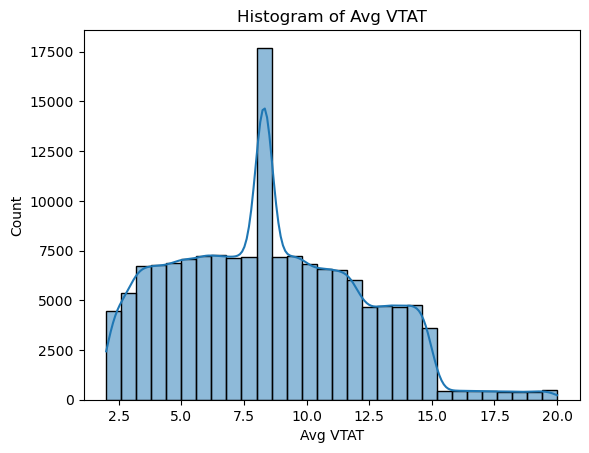

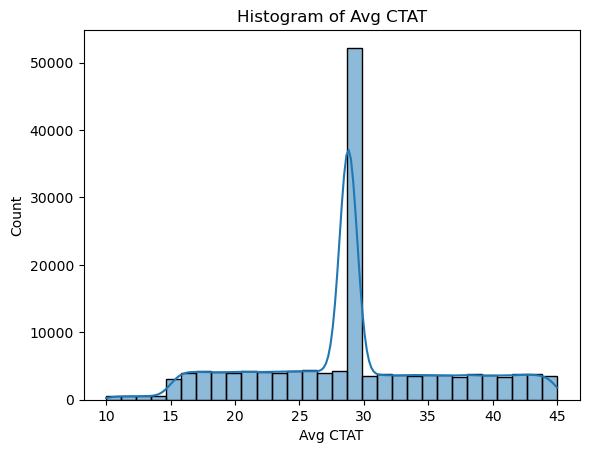

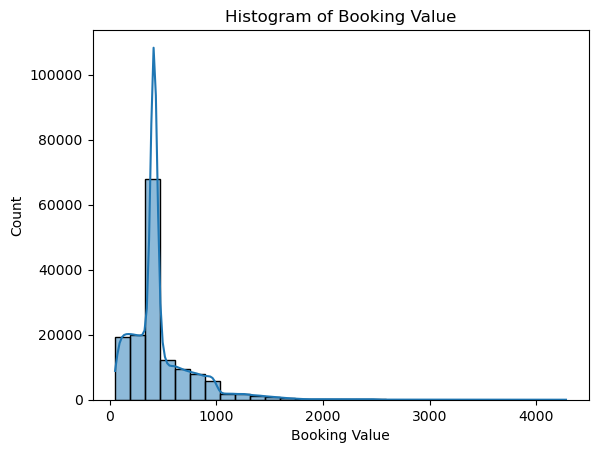

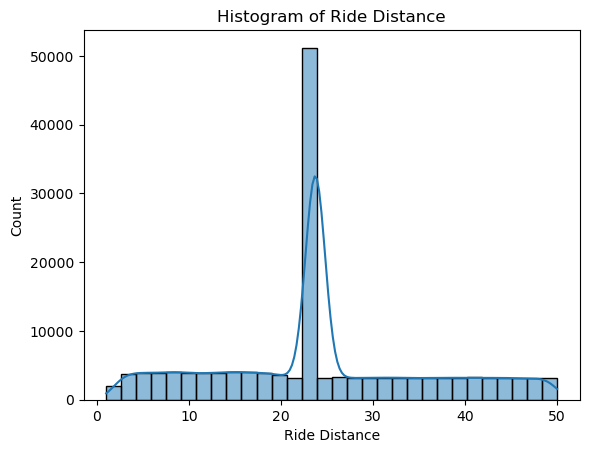

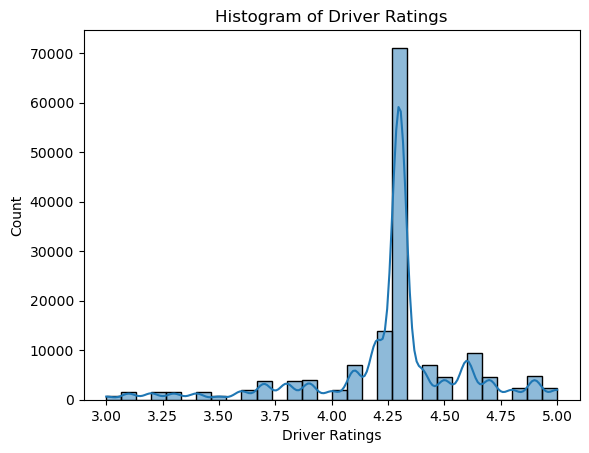

In [14]:
for col in num_cols[:5]:
    plt.figure()
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

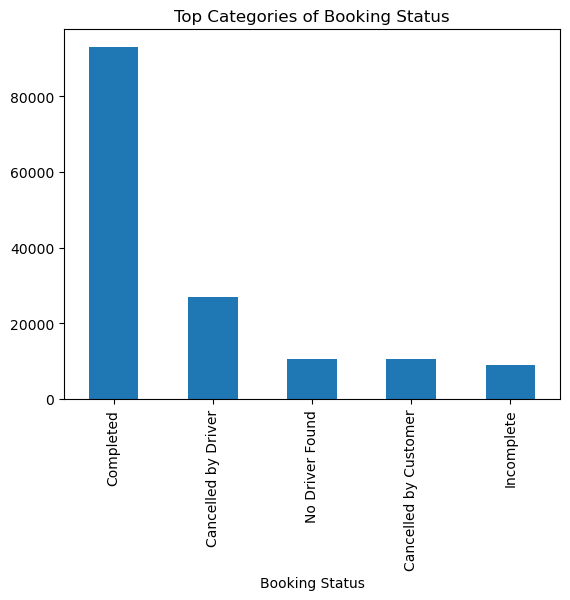

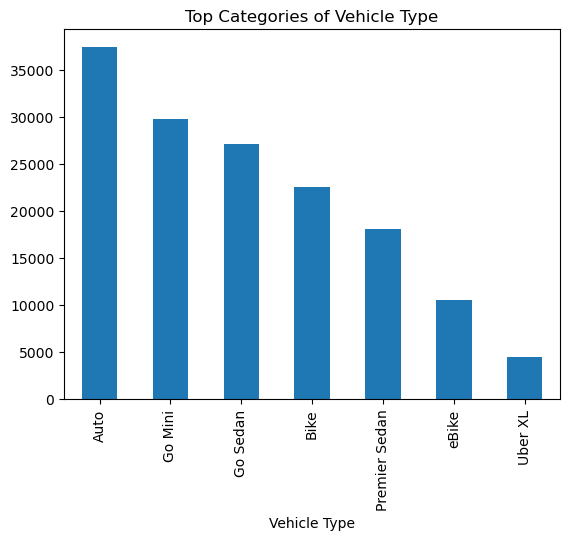

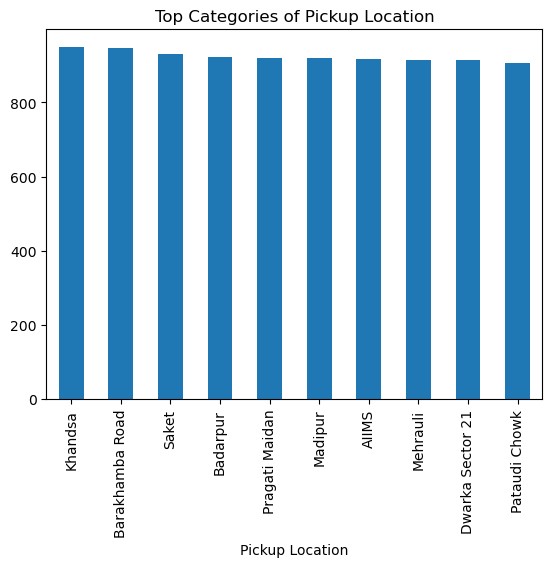

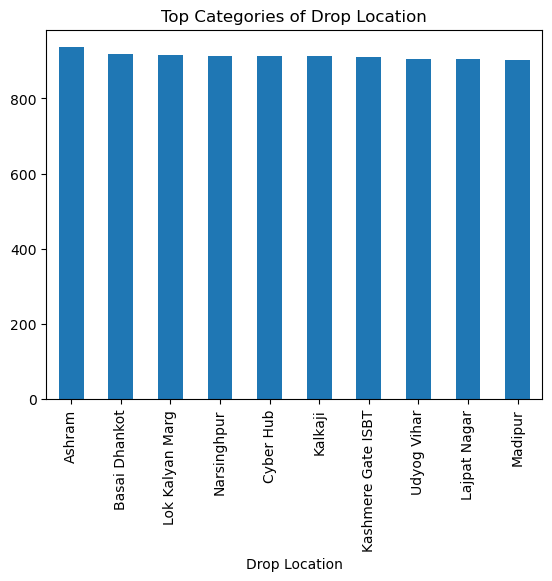

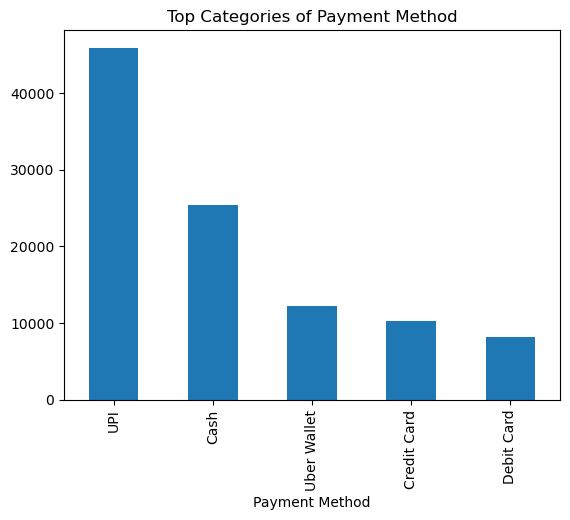

In [15]:
for col in cat_cols[:5]:
    plt.figure()
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top Categories of {col}")
    plt.show()

Correlation ----------

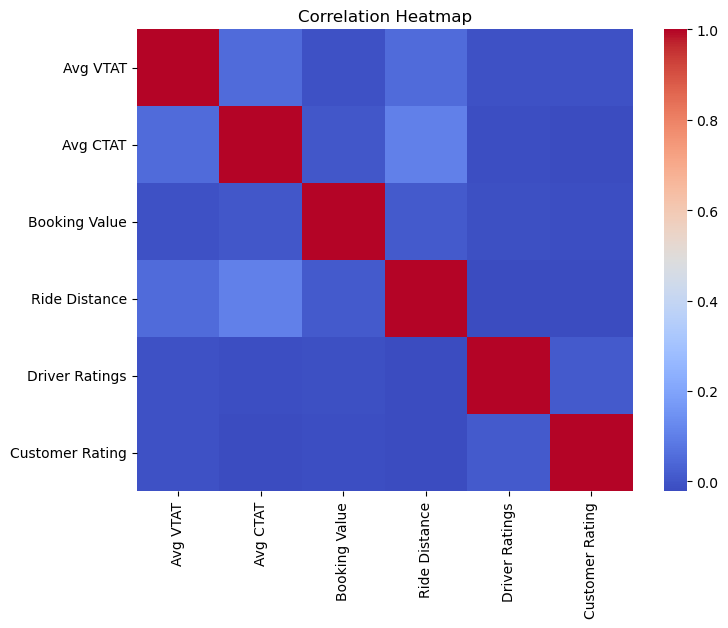

In [16]:
if len(num_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
    plt.title("Correlation Heatmap")
    plt.show()

# Linear Regression ----------

In [17]:
# pick numeric target for regression
linear_target = num_cols[0] if num_cols else None

In [18]:
print("Linear Regression Target:", linear_target)

Linear Regression Target: Avg VTAT


         Booking Status   Vehicle Type         Pickup Location  \
0       No Driver Found          eBike             Palam Vihar   
1            Incomplete       Go Sedan           Shastri Nagar   
2             Completed           Auto                 Khandsa   
3             Completed  Premier Sedan     Central Secretariat   
4             Completed           Bike        Ghitorni Village   
...                 ...            ...                     ...   
149995        Completed        Go Mini                 MG Road   
149996        Completed        Go Mini        Golf Course Road   
149997        Completed       Go Sedan  Satguru Ram Singh Marg   
149998        Completed           Auto               Ghaziabad   
149999        Completed  Premier Sedan         Ashok Park Main   

            Drop Location  Avg VTAT  Avg CTAT  Booking Value  Ride Distance  \
0                 Jhilmil       8.3      28.8          414.0          23.72   
1       Gurgaon Sector 56       4.9      14.0    

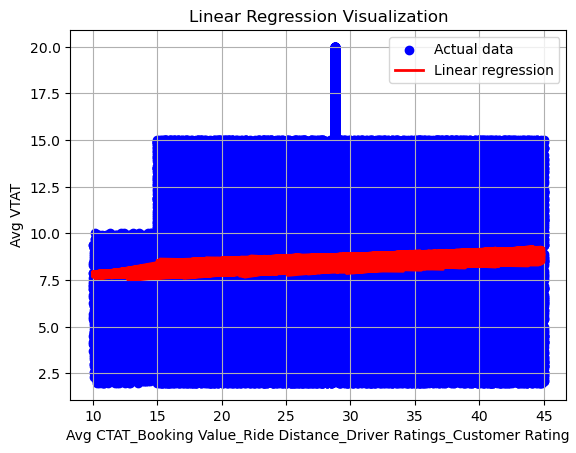

In [19]:
X = df[num_cols[1:]]
Y = df[linear_target]

model = LinearRegression()
model.fit(X, Y)

df['predicted_class'] = model.predict(X)
print(df)

coefficient = model.coef_[0]  
intercept = model.intercept_
print("coefficient:", coefficient)
print("intercept:", intercept)

if X.shape[1] == 1: 
    plt.scatter(X, Y, color='blue', label='Actual data')
    plt.plot(X, Y, color='red', linewidth=2, label=f'Linear regression: y = {coefficient:.2f}x + {intercept:.2f}')
else:
    feature_to_plot = X.columns[0]  
    plt.scatter(X[feature_to_plot], Y, color='blue', label='Actual data')
    plt.plot(X[feature_to_plot], model.predict(X), color='red', linewidth=2, label='Linear regression')

plt.xlabel('Avg CTAT_Booking Value_Ride Distance_Driver Ratings_Customer Rating') 
plt.ylabel(linear_target)
plt.title('Linear Regression Visualization')
plt.legend()
plt.grid(True)
plt.show()

         Booking Status   Vehicle Type         Pickup Location  \
0       No Driver Found          eBike             Palam Vihar   
1            Incomplete       Go Sedan           Shastri Nagar   
2             Completed           Auto                 Khandsa   
3             Completed  Premier Sedan     Central Secretariat   
4             Completed           Bike        Ghitorni Village   
...                 ...            ...                     ...   
149995        Completed        Go Mini                 MG Road   
149996        Completed        Go Mini        Golf Course Road   
149997        Completed       Go Sedan  Satguru Ram Singh Marg   
149998        Completed           Auto               Ghaziabad   
149999        Completed  Premier Sedan         Ashok Park Main   

            Drop Location  Avg VTAT  Avg CTAT  Booking Value  Ride Distance  \
0                 Jhilmil       8.3      28.8          414.0          23.72   
1       Gurgaon Sector 56       4.9      14.0    

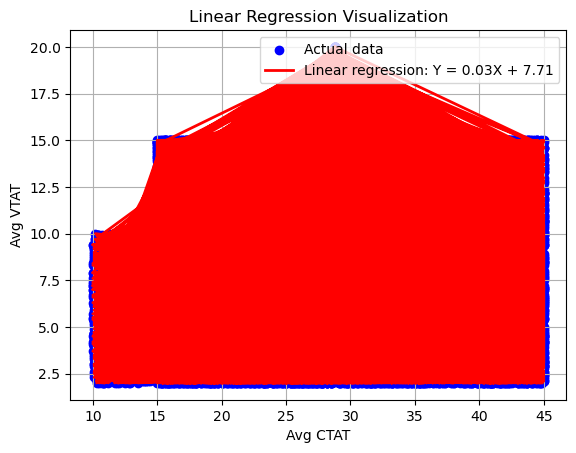

In [20]:
X = df['Avg CTAT'].values.reshape(-1, 1)
Y = df['Avg VTAT']

model = LinearRegression()
model.fit(X, Y)

#df['predicted_prob'] = model.predict_proba(X)[:,1]
df['predicted_class'] = model.predict(X)
print(df)

print("Intercept(B0):", model.intercept_)
print("Coefficient(B1):", model.coef_)

# Store the coefficient and intercept in variables before using them
coefficient = model.coef_[0]  # Extract the coefficient value from the array
intercept = model.intercept_

plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y, color='red', linewidth=2, label=f'Linear regression: Y = {coefficient:.2f}X + {intercept:.2f}')

plt.xlabel('Avg CTAT') 
plt.ylabel('Avg VTAT')
plt.title('Linear Regression Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Drop missing values for target
target = "Booking Value"
df_lr = df.dropna(subset=[target])

# Apply log transformation to target
df_lr["log_booking_value"] = np.log1p(df_lr[target])  # log(1+x) to handle 0s

# Features (drop target, status, and transformed column)
X = df_lr.drop(columns=["Booking Status", target, "log_booking_value"])
y = df_lr["log_booking_value"]


In [22]:
# Preprocessing
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, [c for c in num_cols if c in X.columns]),
    ("cat", categorical_transformer, [c for c in cat_cols if c in X.columns])
])

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
# Linear Regression pipeline
lin_reg_log_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [25]:
# Fit model
lin_reg_log_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT', 'Avg CTAT',
                                                   'Ride Distance',
                                                   'Driver Ratings',
                                                   'Customer Rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type',
                                                   'Pickup Location',
                                                   'Drop Location',
                                                   'Payment Method'])])),
                ('regressor', LinearRegression())])

In [26]:
# Predictions in log scale
y_pred_log = lin_reg_log_model.predict(X_test)

# Convert back to original scale
y_pred = np.expm1(y_pred_log)  # reverse log1p
y_test_original = np.expm1(y_test)

In [27]:
# Evaluation
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Squared Error: 115599.10060619467
Root Mean Squared Error: 339.9986773594784
R² Score: -0.06743689382995588


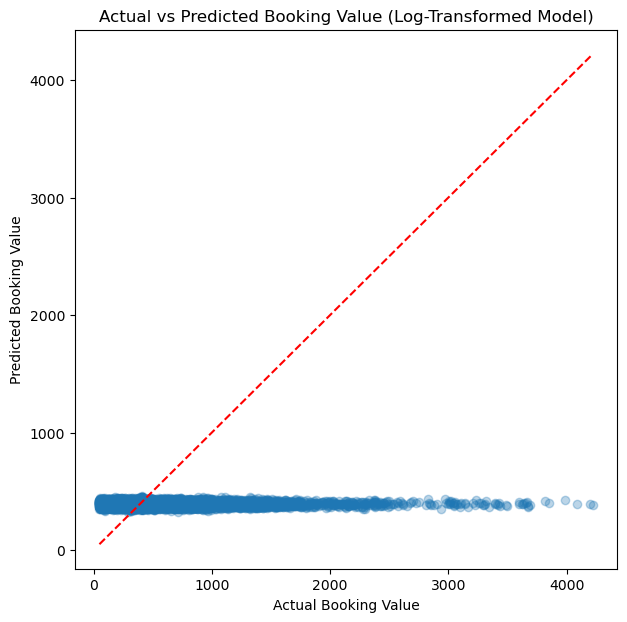

In [28]:
# 1. Actual vs Predicted
plt.figure(figsize=(7,7))
plt.scatter(y_test_original, y_pred, alpha=0.3)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel("Actual Booking Value")
plt.ylabel("Predicted Booking Value")
plt.title("Actual vs Predicted Booking Value (Log-Transformed Model)")
plt.show()

# 1. Actual vs Predicted (Log-Transformed Model)

The predictions are heavily clustered in a narrow band (~300–500 range), while actual booking values span from very small amounts up to 4000+.

The red diagonal (perfect fit line) is far from most blue points → the model is underestimating high booking values and compressing predictions.

This suggests linear regression (even with log transformation) struggles to capture non-linear patterns in booking value.

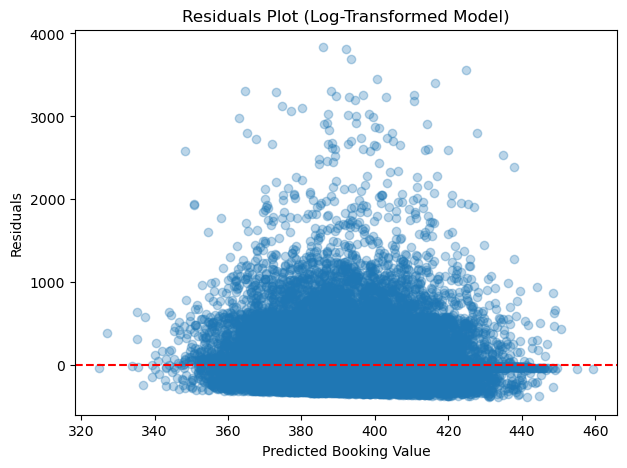

In [29]:
# 2. Residuals Plot
residuals = y_test_original - y_pred
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Booking Value")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Log-Transformed Model)")
plt.show()

# 2. Residuals Plot

Residuals (errors) show a funnel-like shape: as predicted booking values increase, the spread of errors widens.

Many residuals are large positive values, meaning the model systematically under-predicts high fares.

Ideally, residuals should be randomly scattered around zero. Instead, we see structure → another sign linear regression is not flexible enough.

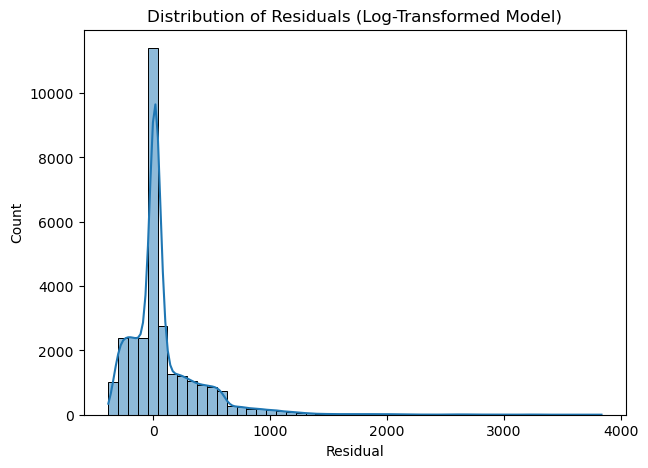

In [30]:
# 3. Residuals Distribution
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residual")
plt.title("Distribution of Residuals (Log-Transformed Model)")
plt.show()

# 3. Residuals Distribution

The residuals distribution is heavily right-skewed.

Peak around 0 (good), but a long positive tail indicates the model frequently misses high fares by a large margin.

This reinforces that linear regression is capturing the “average trend” but not the outliers and high-value bookings.

# Key Takeaways

Log transformation helped stabilize variance a bit, but the model is still far from accurate.

The problem seems non-linear → Linear Regression isn’t flexible enough.

High-value bookings are systematically underestimated.

Next step: try a non-linear regression model (e.g., Random Forest, Gradient Boosting, or XGBoost) which can capture complex interactions between features.

# Logistic Regression ----------

In [31]:
# Define target
df["target"] = df["Booking Status"].apply(lambda x: 1 if x == "Completed" else 0)

X = df.drop(columns=["Booking Status", "target"])
y = df["target"]

In [32]:

# Preprocessing pipelines
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, [c for c in num_cols if c in X.columns]),
    ("cat", categorical_transformer, [c for c in cat_cols if c in X.columns])
])

In [33]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

log_reg_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT', 'Avg CTAT',
                                                   'Booking Value',
                                                   'Ride Distance',
                                                   'Driver Ratings',
                                                   'Customer Rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type',
                                                   'Pickup Location',
                                                   'Drop Location',
                                                   'Payment Method'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [34]:
# Predictions
y_pred = log_reg_model.predict(X_test)
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

In [35]:

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8303666666666667

Confusion Matrix:
 [[10307  1051]
 [ 4038 14604]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.91      0.80     11358
           1       0.93      0.78      0.85     18642

    accuracy                           0.83     30000
   macro avg       0.83      0.85      0.83     30000
weighted avg       0.85      0.83      0.83     30000



ROC-AUC: 0.8220642347949073


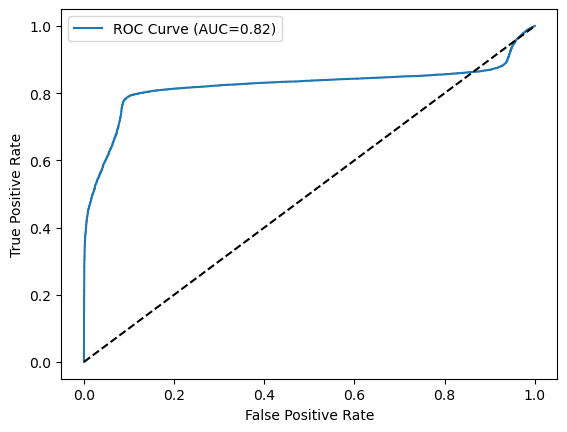

In [36]:
# ROC-AUC curve (for binary classification)
if len(np.unique(y)) == 2:
    auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC:", auc)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC={auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# KMeans Clustering ----------

In [37]:
# Select features for clustering (exclude IDs, targets, non-numeric)
features = df.drop(columns=["Booking ID", "Booking Value"], errors="ignore")  # drop ID & target
X = features.select_dtypes(include=['int64','float64'])

In [38]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Elbow method to find optimal k
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

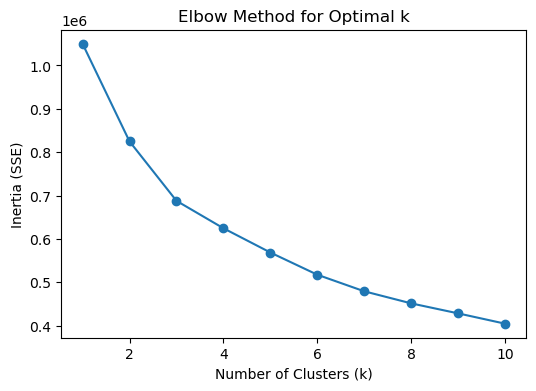

In [40]:
plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [41]:
# Fit KMeans with chosen k (say k=3 or 4 after elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [42]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Cluster
1    424.300054
2    507.515531
3    508.015164
0    509.015239
Name: Booking Value, dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


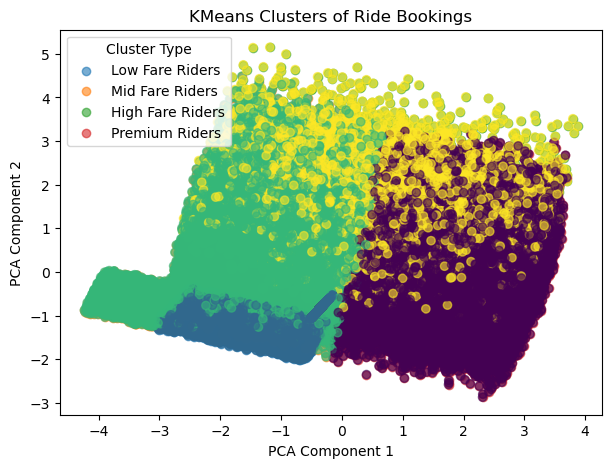

In [43]:
# Example: interpret clusters by their average Booking Value
cluster_summary = df.groupby("Cluster")["Booking Value"].mean().sort_values()
print(cluster_summary)

# Map cluster numbers → meaningful names
cluster_labels = {
    cluster_summary.index[0]: "Low Fare Riders",
    cluster_summary.index[1]: "Mid Fare Riders",
    cluster_summary.index[2]: "High Fare Riders",
    cluster_summary.index[3]: "Premium Riders"
}

df["Cluster Name"] = df["Cluster"].map(cluster_labels)

plt.figure(figsize=(7,5))
for cluster, name in cluster_labels.items():
    plt.scatter(
        X_pca[df["Cluster"]==cluster,0], 
        X_pca[df["Cluster"]==cluster,1], 
        label=name, alpha=0.6
    )
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clusters of Ride Bookings")
plt.legend(title="Cluster Type")
plt.show()

# Insights from the Graph

1. Clear Segmentation of Riders

The clusters are well-separated, meaning the KMeans algorithm has successfully grouped riders based on their booking characteristics (likely influenced by fare, ride distance, or duration).

Each cluster shows a distinct behavioral pattern, useful for targeted strategies.

2. Low Fare Riders (Blue Cluster, far left)

This group is clearly isolated, suggesting they have consistently low booking values.

Likely represent budget-conscious commuters (e.g., daily short-distance riders).

3. Mid Fare Riders (Yellow Cluster, center)

Positioned between low and high fare groups.

This group has moderate booking values, possibly occasional riders or medium-distance commuters.

4. High Fare Riders (Green Cluster, right side)

Spread across the upper-right side, showing higher variability in ride behavior.

Indicates frequent travelers with higher-than-average spending.

5. Premium Riders (Red/Purple Cluster, overlapping with High Fare)

Found on the far-right edge, they represent the highest booking values.

Likely include luxury service users, long-distance travelers, or corporate accounts.

Though close to high fare riders, they form their own elite cluster.

6. Business Implications

Low Fare Riders → Can be offered loyalty rewards or discounts to encourage frequent use.

Mid Fare Riders → Upselling opportunities (e.g., premium rides, bundled packages).

High Fare Riders → Personalized offers for long-distance trips.

Premium Riders → Exclusive benefits (priority booking, premium customer support).

# Random Forest Classifier ---------

Accuracy: 0.9621666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.55      0.68      2077
           1       0.85      0.97      0.90      5431
           2       1.00      1.00      1.00     18642
           3       1.00      1.00      1.00      1752
           4       0.95      1.00      0.97      2098

    accuracy                           0.96     30000
   macro avg       0.94      0.90      0.91     30000
weighted avg       0.96      0.96      0.96     30000


Confusion Matrix:
 [[ 1135   923     0     0    19]
 [  104  5243     0     0    84]
 [    0     0 18642     0     0]
 [    0     0     0  1752     0]
 [    1     4     0     0  2093]]


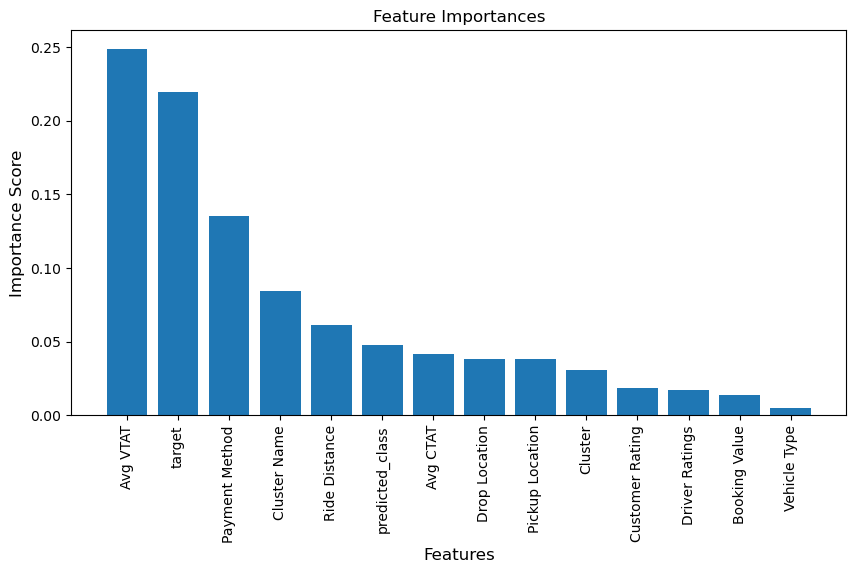

In [44]:

# Make a copy
df_encoded = df.copy()

# Encode categorical variables
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Define Features & Target
X = df_encoded.drop(columns=["Booking Status"])   # features
y = df_encoded["Booking Status"]                  # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.show()

# Random Forest Regressor --------

R² Score: -0.0116
MSE: 109546.85
RMSE: 330.98
MAE: 200.8


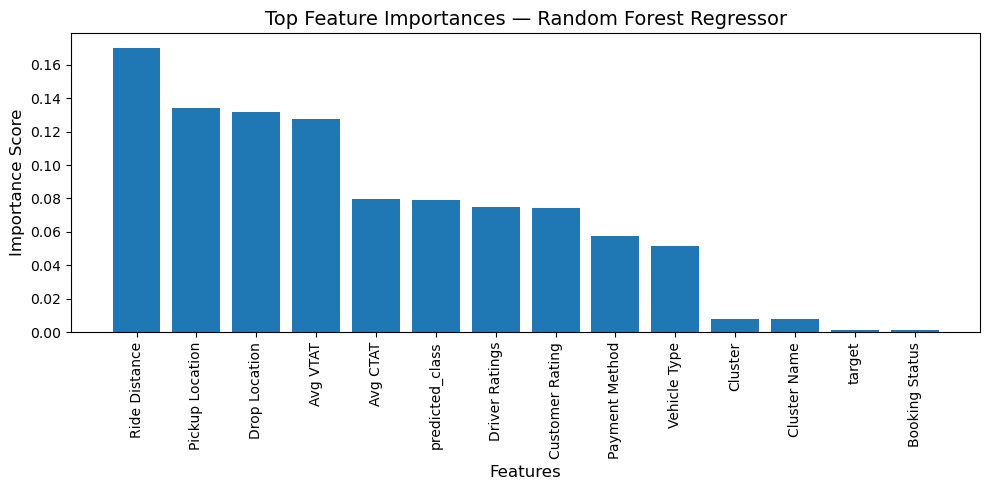

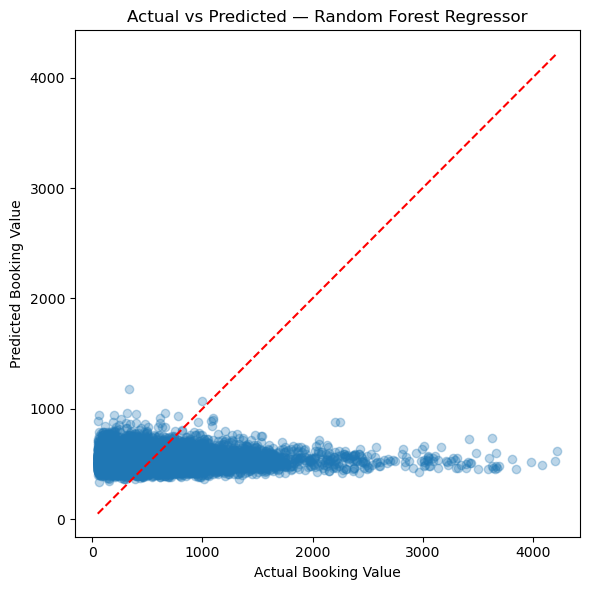

In [46]:

# --- 1) Prep data ---
df_rf = df.copy()

# Drop rows with missing target
df_rf = df_rf.dropna(subset=["Booking Value"])

# Optional: drop pure ID columns that don't help prediction
for col in ["Booking ID", "Customer ID"]:
    if col in df_rf.columns:
        df_rf.drop(columns=[col], inplace=True)

# Impute missing values BEFORE encoding
for col in df_rf.columns:
    if df_rf[col].dtype == "object":
        df_rf[col] = df_rf[col].fillna("Unknown")
    else:
        df_rf[col] = df_rf[col].fillna(df_rf[col].median())

# Label-encode ALL object columns (trees handle integer-coded categories well)
df_enc = df_rf.copy()
for col in df_enc.select_dtypes(include=["object"]).columns:
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col].astype(str))

# --- 2) Features & target ---
X = df_enc.drop(columns=["Booking Value"])
y = df_enc["Booking Value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3) Model ---
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)

# --- 4) Predict & evaluate (compat with older sklearn) ---
y_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)     # no 'squared' arg in older versions
rmse = np.sqrt(mse)                          # compute RMSE manually
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("R² Score:", round(r2, 4))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))

# --- 5) Feature importance plot (with axis labels) ---
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = min(20, X.shape[1])  # show top 20 for readability
top_idx = indices[:top_n]

plt.figure(figsize=(10,5))
plt.title("Top Feature Importances — Random Forest Regressor", fontsize=14)
plt.bar(range(top_n), importances[top_idx])
plt.xticks(range(top_n), X.columns[top_idx], rotation=90)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.tight_layout()
plt.show()

# --- 6) Predicted vs Actual scatter (helpful sanity check) ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
m = min(y_test.min(), y_pred.min())
M = max(y_test.max(), y_pred.max())
plt.plot([m, M], [m, M], 'r--')
plt.xlabel("Actual Booking Value")
plt.ylabel("Predicted Booking Value")
plt.title("Actual vs Predicted — Random Forest Regressor")
plt.tight_layout()
plt.show()
